## Temporally Extended Successor Representations

### Imports 

In [1]:

import utils 
import numpy as np
import matplotlib.pyplot as plt
import itertools

from collections import defaultdict

%matplotlib inline


### (Hyper)parameters

In [2]:
GAMMA = 0.99
MAX_SKIP = 7
ENV_NAME = "four_rooms" # four_rooms, junction_hard, open_field_10, open_field 50


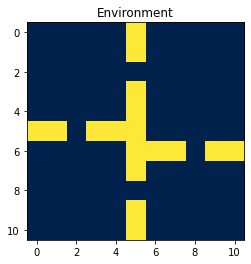

In [3]:
Ts, env = utils.make_transition_functions(ENV_NAME)
dims = utils.get_dims(env)
utils.plot_env(env)

### Vanilla successor representation
$$\mathbf{M}^{\pi}(s, s') = (I - \gamma T^{\pi})^{-1}$$
$$\pi = \text{uniform random} $$

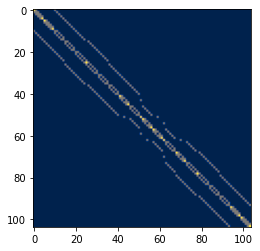

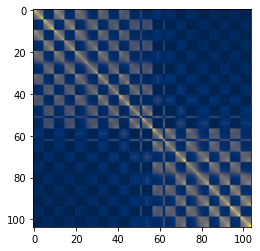

In [4]:
M_uniform = utils.compute_random_walk_SR(Ts, gamma = GAMMA)
utils.plot_SR(M_uniform)

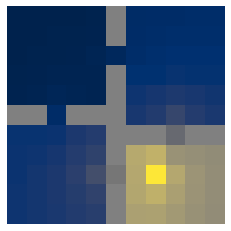

In [5]:
utils.plot_SR_column(M_uniform, env, s= 80, dims = dims, title = "", show = True, save = False)

### Temporally Extended Successor Representations
Following from the Neumann sum formulation of the analytic SR, we can derive an expression for computing a related matrix that considers first following some other policy with a fixed finite horizion before returning to a baseline policy (in this case the uniform random policy)

$$    \mathbf{M}^{\pi_x} = \mathbb{E}^{\pi_x} \left[\sum_{k=0}^{j} \left( \gamma \mathbf{T}_a \right)^k \right] + \mathbb{E}^{\pi}\left[(\gamma \mathbf{T}_a)^j \right]\left(\mathbb{I} - \gamma \mathbb{E}^\pi\left[\mathbf{T}_a \right] \right)^{-1} $$

Where  $\mathbf{T_a}$ is the transition matrix for a given  $a$ i.e.
$${\mathbf{T}^\pi = \mathbb{E}^\pi \left[ \mathbf{T}_a\right] }$$

$\pi_x$ is a time dependent pseudo-policy (rather  than state dependant) that chooses actions according to the sequence some sequence of actions/policies of length j
Here we first consider the case where these sequences of actions deterministically sample the same action.} This allows us to formulate a policy for  $\pi_a$ and a policy for $\pi_j$ as is done in http://proceedings.mlr.press/v139/biedenkapp21a/biedenkapp21a.pdf.

We will not consider control in this notebook, but in that instance you would need to have a one-step action SR, and a set of t-SR, one for each allowable j. 



In [22]:
M_random_J = utils.compute_random_walk_temporal_SR(Ts, M_uniform, dims = dims, j = MAX_SKIP, gamma = GAMMA)

### t-SR with j = 3
This shows the random walk t-SR with a horizon of 3 steps with "temporally extended actions" i.e. an action is sampled randomly from the action space, and $\pi_x$ simply returns this action again for 3 steps. 

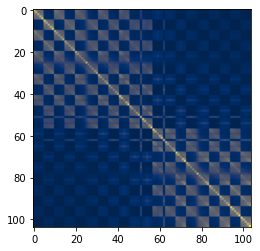

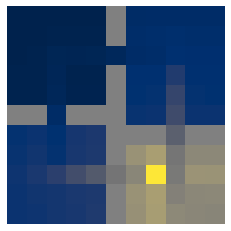

In [23]:
utils.plot_SR(M_random_J[2], save = False)
utils.plot_SR_column(M_random_J[2], env, s= 80, dims = dims, title = "", show = True, save = False)

### t-SR with j = 7

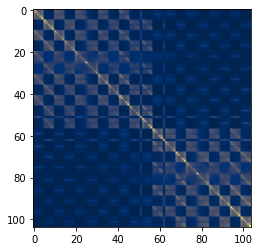

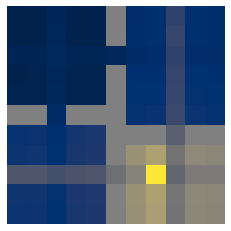

In [24]:
utils.plot_SR(M_random_J[6], save = False)
utils.plot_SR_column(M_random_J[6], env, s= 80, dims = dims, title = "", show = True, save = False)

### Macro Action Discovery with the t-SR
Instead of starting with temporally extended actions, we can try and find the $\pi_x$ that maximise some useful heuristic, and use these to form a set of macro actions to augment an action space.

#### Macro actions under the 2 norm 

In [29]:
results = []
for j in range(1, MAX_SKIP + 1):
    action_sequences = list(itertools.product(*[range(4) for _ in range(j)]))
                                                                                                                       
    for seq in action_sequences:                                                                                                             
        M_macro_seq = utils.compute_macro_action_temporal_SR(Ts, M_uniform, dims, seq)                                                               
        norm = np.linalg.norm(M_macro_seq - M_uniform, 2)                                                                                             
        if len(results) < 25:                                                                                                                                                                                                                                                     
            results.append((norm, seq))                                                                                               
        else:                                                                                                                                
            results.sort(reverse=True)                                                                                                       
            if results[-1][0] < norm:                                                                                                        
                results.pop()                                                                                                                
                results.append((norm, seq))      
utils.print_macro_actions(results)        

Loss ::: Action Sequence
291.407 ↓ ↓ ← ← ← ↓ ← 
291.166 ↓ ↓ ← ← ← ← ↓ 
289.274 ↓ ↓ → → → ↓ → 
288.79 ↓ ↓ → → → → ↓ 
286.9 ↑ ↑ → → → ↑ → 
286.855 ↓ ↓ ↓ ← ← ← ← 
286.807 ↓ ↓ ↓ → → → → 
286.391 ↑ ↑ → → → → ↑ 
285.719 ↓ ← ← ← ↓ ↓ ← 
285.454 → → → ↓ ↓ ↓ → 
285.152 ← ← ← ↓ ↓ ↓ ← 
284.988 ↓ ← ← ← ↓ ← ↓ 
284.873 → → → ↑ ↑ ↑ → 
284.801 ← ↓ ↓ ← ← ↓ ← 
284.588 ← ↓ ↓ ← ← ← ↓ 
284.435 ← ← ← ↓ ↓ ← ↓ 
283.92 ← ← ← ↑ ↑ ↑ ← 
283.819 → → → ↓ ↓ → ↓ 
283.585 ↑ ↑ ↑ → → → → 
283.21 → → → ↑ ↑ → ↑ 
283.046 → ↓ ↓ → → ↓ → 
282.555 → ↓ ↓ → → → ↓ 
282.124 ↓ ← ← ← ← ↓ ↓ 
281.51 ↓ ← ↓ ← ← ↓ ← 
281.49 ↑ ↑ ↑ ← ← ← ← 
281.332 ↓ ← ↓ ← ← ← ↓ 
280.77 → ↓ ↓ ↓ → → → 
280.634 ← ↓ ↓ ↓ ← ← ← 
280.519 → ↑ ↑ → → ↑ → 
280.03 → ↑ ↑ → → → ↑ 
279.954 ← ↓ ← ← ↓ ↓ ← 
279.73 ↓ → → → ↓ ↓ → 
279.556 → → → → ↓ ↓ ↓ 
279.334 ↑ ↑ ← ← ← ↑ ← 
279.301 ← ↓ ← ← ↓ ← ↓ 
279.179 ← ← ← ← ↓ ↓ ↓ 
279.074 ← ← ↓ ↓ ← ↓ ↓ 
278.998 ↓ ↓ ← ← ↓ ← ← 
278.964 ↓ ↓ ← ↓ ← ← ← 
278.916 → → → → ↑ ↑ ↑ 
278.872 ← ← ↓ ↓ ↓ ← ↓ 
278.719 ← ← ↓ ↓ ← ↓ ← 
278.608 ← ← ← ← ↑ ↑

The longer sequences always lead to a higher norm between SRs: if we normalise by the length of the sequence, we get the following

In [30]:
results = []
for j in range(1, MAX_SKIP + 1):
    action_sequences = list(itertools.product(*[range(4) for _ in range(j)]))
                                                                                                                       
    for seq in action_sequences:                                                                                                             
        M_macro_seq = utils.compute_macro_action_temporal_SR(Ts, M_uniform, dims, seq)                                                               
        norm = np.linalg.norm(M_macro_seq - M_uniform, 2) / j                                                                                           
        if len(results) < 100:                                                                                                                                                                                                                                                     
            results.append((norm, seq))                                                                                               
        else:                                                                                                                                
            results.sort(reverse=True)                                                                                                       
            if results[-1][0] < norm:                                                                                                        
                results.pop()                                                                                                                
                results.append((norm, seq))      
utils.print_macro_actions(results)        

Loss ::: Action Sequence
58.611 ↑ 
58.449 ↓ 
58.288 ← 
58.286 → 
50.023 ↓ ↓ 
49.856 ↑ ↑ 
49.737 → → 
49.734 ← ← 
46.032 ↓ ↓ ↓ 
45.83 ↑ ↑ ↑ 
45.754 → → → 
45.752 ← ← ← 
44.923 ← ↓ 
44.921 → ↓ 
44.913 ↑ → 
44.907 ↓ → 
44.906 ↓ ← 
44.903 ↑ ← 
44.893 → ↑ 
43.855 ← ↑ 
43.478 ↓ ↓ ← 
43.247 ↓ ↓ → 
43.146 ↑ ↑ → 
43.129 ↑ ↑ ← 
43.125 ← ← ↓ 
43.125 → → ↓ 
43.074 → → ↑ 
42.881 ↓ → ↓ 
42.874 ↓ ← ↓ 
42.79 → → → → 
42.788 ← ← ← ← 
42.732 → ↓ → 
42.731 ← ↓ ← 
42.721 ↑ → ↑ 
42.684 → ↑ → 
42.377 ↓ ↓ ↓ → 
42.364 ↓ ↓ ↓ ← 
42.262 ↑ ↑ ↑ → 
42.26 ← ↓ ↓ 
42.215 → → → ↓ 
42.213 ← ← ← ↓ 
42.17 → → → ↑ 
42.142 ↑ ↑ ↑ ← 
42.128 ← ↓ ↓ ← 
42.049 ← ↑ ← 
41.924 ↓ ↓ ← ↓ 
41.868 ← ← ↑ 
41.811 ↑ ← ↑ 
41.801 ↓ ↓ → ↓ 
41.799 ↓ ↓ ← ← ← ↓ 
41.698 ↓ ← ← ← ↓ 
41.695 ↓ → → → ↓ 
41.69 → ↓ ↓ ↓ → 
41.684 ← ↓ ← ↓ 
41.655 ← ↓ ↓ ↓ ← 
41.63 ↓ ↓ ← ← ← ↓ ← 
41.616 ↑ ↑ → ↑ 
41.607 → → ↓ → 
41.605 ← ← ↓ ← 
41.603 ↓ ↓ ← ← ↓ ← 
41.595 ↓ ↓ ← ← ← ← ↓ 
41.575 → ↑ ↑ ↑ → 
41.57 → ↓ ↓ 
41.555 → → ↑ → 
41.51 ↓ ↓ → → → ↓ 
41.494 ← ← ↓ ↓ ← 
41.462 

#### Macro actions under the 1 norm 

In [25]:
results = []
for j in range(1, MAX_SKIP + 1):
    # loop through every possible sequence of actions
    action_sequences = list(itertools.product(*[range(4) for _ in range(j)]))
                                                                                                                       
    for seq in action_sequences:                     
        # difference between the baseline random walk SR and the t-SR induced by the macro action
        M_macro_seq = utils.compute_macro_action_temporal_SR(Ts, M_uniform, dims, seq)                                                               
        norm = np.linalg.norm(M_macro_seq - M_uniform, 1) / j  
        
        # only keep the top n
        if len(results) < 25:                                                                                                                                                                                                                                                     
            results.append((norm, seq))                                                                                               
        else:                                                                                                                                
            results.sort(reverse=True)                                                                                                       
            if results[-1][0] < norm:                                                                                                        
                results.pop()                                                                                                                
                results.append((norm, seq))      
                
utils.print_macro_actions(results)     

Loss ::: Action Sequence
207.623 ← ↑ ← ↑ ← ↑ ← 
207.623 ← ↑ ← ↑ ↑ ← ← 
207.623 ← ↑ ↑ ← ← ↑ ← 
207.623 ← ↑ ↑ ← ↑ ← ← 
207.623 ↑ ← ← ↑ ← ↑ ← 
207.623 ↑ ← ← ↑ ↑ ← ← 
207.623 ↑ ← ↑ ← ← ↑ ← 
207.623 ↑ ← ↑ ← ↑ ← ← 
207.623 ← ↑ ← ↑ ← ↑ ↑ 
207.623 ← ↑ ← ↑ ↑ ← ↑ 
207.623 ← ↑ ↑ ← ← ↑ ↑ 
207.623 ← ↑ ↑ ← ↑ ← ↑ 
207.623 ↑ ← ← ↑ ← ↑ ↑ 
207.623 ↑ ← ← ↑ ↑ ← ↑ 
207.623 ↑ ← ↑ ← ← ↑ ↑ 
207.623 ↑ ← ↑ ← ↑ ← ↑ 
207.623 ← ↓ ↓ ← ← ↓ ↓ 
207.623 ↓ ← ↓ ← ← ↓ ↓ 
207.623 ← ↓ ← ↓ ← ↓ ↓ 
207.623 ← ↓ ← ↓ ↓ ← ↓ 
207.623 ← ↓ ↓ ← ↓ ← ↓ 
207.623 ↓ ← ← ↓ ← ↓ ↓ 
207.623 ↓ ← ← ↓ ↓ ← ↓ 
207.623 ↓ ← ↓ ← ↓ ← ↓ 
207.623 → ↑ → ↑ → ↑ ↑ 
207.623 → ↑ → ↑ ↑ → ↑ 
207.623 → ↑ ↑ → → ↑ ↑ 
207.623 → ↑ ↑ → ↑ → ↑ 
207.623 ↑ → → ↑ → ↑ ↑ 
207.623 ↑ → → ↑ ↑ → ↑ 
207.623 ↑ → ↑ → → ↑ ↑ 
207.623 ↑ → ↑ → ↑ → ↑ 
207.623 ← ↓ ← ↓ ← ↓ ← 
207.623 ↓ ← ↓ ← ← ↓ ← 
207.623 ↓ ← ↓ ← ↓ ← ← 
207.623 → ↑ → ↑ → ↑ → 
207.623 → ↑ → ↑ ↑ → → 
207.623 → ↑ ↑ → → ↑ → 
207.623 → ↑ ↑ → ↑ → → 
207.623 ↑ → → ↑ → ↑ → 
207.623 ↑ → → ↑ ↑ → → 
207.623 ↑ → ↑ → → ↑ → 
207.623 ↑

#### Macro actions under the inf norm

In [32]:
results = []
for j in range(1, MAX_SKIP + 1):
    action_sequences = list(itertools.product(*[range(4) for _ in range(j)]))
                                                                                                                       
    for seq in action_sequences:                                                                                                             
        M_macro_seq = utils.compute_macro_action_temporal_SR(Ts, M_uniform, dims, seq)                                                               
        norm = np.linalg.norm(M_macro_seq - M_uniform, np.inf)                                                                                             
        if len(results) < 25:                                                                                                                                                                                                                                                     
            results.append((norm, seq))                                                                                               
        else:                                                                                                                                
            results.sort(reverse=True)                                                                                                       
            if results[-1][0] < norm:                                                                                                        
                results.pop()                                                                                                                
                results.append((norm, seq))      
utils.print_macro_actions(results)      

Loss ::: Action Sequence
157.957 ← ← ← ↑ ↑ ↑ ← 
157.178 → → → ↑ ↑ ↑ → 
156.663 ↓ ↓ ↓ ← ← ← ← 
156.529 → → → ↓ ↓ ↓ → 
156.378 ↓ ↓ ← ← ← ← ↓ 
156.258 ↓ ↓ ← ← ← ↓ ← 
156.099 ↑ ↑ ↑ → → → → 
156.017 ← ↓ ↓ ← ← ↓ ← 
155.947 ↑ → → → ↑ ↑ → 
155.921 → → → → ↑ ↑ ↑ 
155.894 ← ↓ ↓ ↓ ← ← ← 
155.838 ← ↓ ↓ ← ← ← ↓ 
155.745 ← ← ← ↑ ← ↑ ↑ 
155.726 ← ← ← ↓ ↓ ← ↓ 
155.696 ↓ ↓ ↓ → → → → 
155.683 ← ← ↑ ← ↑ ↑ ← 
155.683 ← ↑ ← ← ↑ ↑ ← 
155.66 ← ← ← ← ↑ ↑ ↑ 
155.611 ← ← ← ↓ ↓ ↓ ← 
155.561 ← ← ← ↑ ↑ ← ↑ 
155.425 ↑ ↑ ↑ → → → ↑ 
155.419 ↓ ↓ ↓ → → → ↓ 
155.291 → → → ↓ ↓ ↓ ↓ 
155.037 ← ← ↓ ↓ ← ↓ ← 
155.025 → → ↑ → ↑ ↑ → 


### Online Macro Action Discovery


Here we will try the simplest form of macro action discovery - learn a single additional macro action (so we don't have to worry about diversity). We will do this by considering the macro action as the policy determined by the greedy policy over a set of abstract Q values with a reward function determined by the difference in successor representation for the macro action and a baseline

#### Random Walk

In [21]:
MACRO_LENGTH = 5
ALPHA = 0.5
s = 80
action_map = {0: "UP", 1: "RIGHT", 2: "DOWN", 3: "LEFT"}
#Q = defaultdict(lambda: np.zeros(len(action_map.keys())))

Q_abstract_macro = {i: np.zeros(len(action_map.keys())) for i in range(MACRO_LENGTH)}

M_baseline = defaultdict(lambda: np.zeros(dims["states"]))
M_macro = defaultdict(lambda: np.zeros(dims["states"]))

# action space is the primitives plus the macro action
a = np.random.randint(4 + 1)

# on policy SARSA style TD update rules for random walk
for i in range(1000000):
    if a == 4:
        macro_reward = np.zeros(dims["states"])
        # store rewards along the subtrajectory to update at the end so we know what actions we are taking
        abstract_rewards = np.zeros(MACRO_LENGTH)
        macro_rewards = np.zeros([MACRO_LENGTH, dims["states"]])
        
        states_seen = [s]
        actions_taken = []
        for t in range(MACRO_LENGTH):
            q_t = Q_abstract_macro[t]
            # awkward syntax for tie breaks
            a = np.random.choice(np.where(q_t == q_t.max())[0])
            s_vector = Ts[action_map[a]][s]
            s_ = int(np.where(s_vector == 1)[0])
            states_seen.append(s_)
            actions_taken.append(a)
            s = s_
        # now we have the sequence of actions and states, we can compute the abstract rewards
       
        # TODO update tSR before or after abstract rewards are computed? 
        abstract_reward = [np.linalg.norm(M_macro[(s,a)] - M_baseline[(s,a)]) for s, a in zip(states_seen[1:], actions_taken)]
        
        # choose last action randomly - could take the expectation over the last SR instead
        a_ = np.random.randint(4)
        t = len(actions_taken) - 1
        # final abstract state is always a terminal state - has zero value
        q_tp1 = np.zeros(len(action_map.keys()))
        # TODO seeing as we are doing this reverse loop, we could compute n-step returns
        for s, a in zip(reversed(states_seen[:-1]), reversed(actions_taken)):
            s_vector = np.eye(dims["states"])[s_]
            sr_target = s_vector + GAMMA * M_macro[(s_, a_)]
            M_macro[(s, a)] += ALPHA * (sr_target - M_macro[(s,a)])
            
            q_t = Q_abstract_macro[t]
            target = abstract_reward[t] + GAMMA * q_tp1[a_]
            q_t[a] += ALPHA * (target - q_t[a])
            
            a_ = a
            s_ = s
            q_tp1 = q_t
            t+=-1
        # make sure last action matches for next step
        a = actions_taken[-1]
        s = states_seen[-1]
    else:
        
        # one hot vector for our "reward" for SR TD
        s_vector = Ts[action_map[a]][s]
        s_ = int(np.where(s_vector == 1)[0])
        # next random walk action
        a_ = np.random.randint(4 + 1)
        target = s_vector + GAMMA * M_baseline[(s_, a_)]
        M_baseline[(s,a)] += ALPHA * (target - M_baseline[(s,a)])
        s = s_
        a = a_


{0: array([ 0.        ,  0.        , 14.51766405,  0.        ]), 1: array([ 0.        ,  0.        ,  0.        , 11.53870887]), 2: array([0.        , 0.        , 0.        , 9.09633318]), 3: array([0.        , 0.        , 7.05279595, 0.        ]), 4: array([3.13323286, 0.        , 0.        , 0.        ])}


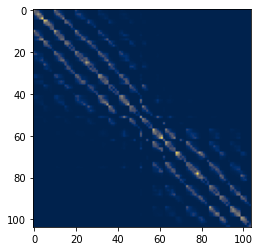

In [22]:
print(Q_abstract_macro)
M_combined = np.zeros([dims["states"], dims["states"]])
for act in range(4):
    for state in range(dims["states"]):
        M_combined[state, :] += 0.25 * M_baseline[(state, act)]
plt.imshow(M_combined)